# **Bibliotecas**

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Explorando o Conjunto de Dados**

In [124]:
df=pd.read_csv('/kaggle/input/amazon-product-reviews/Reviews.csv')

In [127]:

df2=df.copy()
df.head(1000)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
995,996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


In [5]:
# Know number of columns and rows
df.shape

(568454, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
df['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

In [8]:
df.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessDenominator','HelpfulnessNumerator','Time',
        'Summary'],axis=1,inplace=True)


In [9]:
# to ensure that there are only 2 columns
df.columns

Index(['Score', 'Text'], dtype='object')

In [10]:
# to check for null values after in Text and Score column
df.isna().sum()

Score    0
Text     0
dtype: int64

In [11]:
# To check for duplicates
df.duplicated().sum()

174779

In [12]:
df.drop_duplicates(inplace=True)


In [13]:
df.shape

(393675, 2)

# **explorando a coluna `Score`**

In [14]:

df['Score'].nunique()

5

In [15]:

df['Score'].unique()

array([5, 1, 4, 2, 3])

# **Distribuição das avaliações na coluna `Score`**

In [16]:

df['Score'].value_counts()/len(df)*100

Score
5    63.693402
4    14.243729
1     9.215724
3     7.562583
2     5.284562
Name: count, dtype: float64

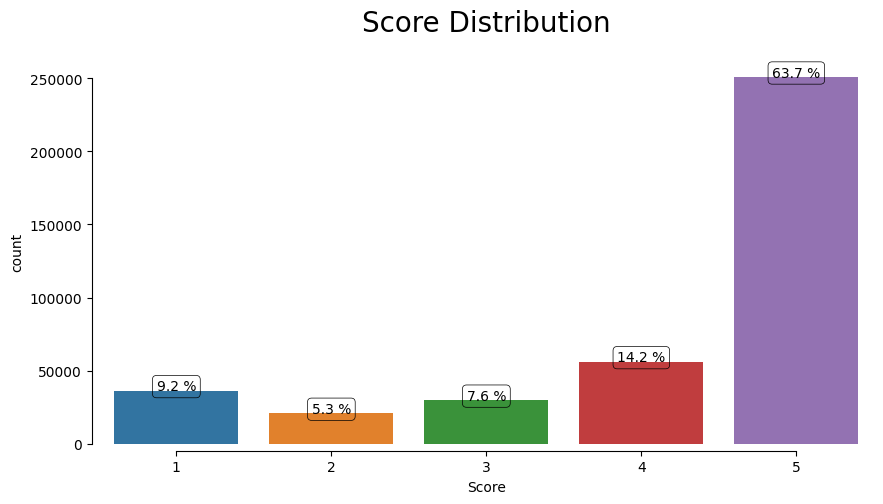

In [17]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['Score'])
total=float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 75,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
ax.set_title('Score Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

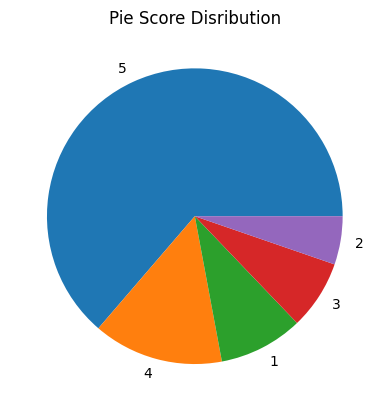

In [18]:
score_values=df['Score'].value_counts()
plt.pie(score_values,labels=score_values.index)
plt.title('Pie Score Disribution')
plt.show()

# **Coletando amostras da coluna `Score` **

In [19]:
new_df= df.groupby('Score').apply(lambda x: x.sample(10000)).reset_index(drop=True)

In [20]:
new_df

,Score,Text
0,1,The wheat free brownie mix is not to my liking...
1,1,"saltyness may be the ""norm"" for products like ..."
2,1,I purchased this product from Otto's because t...
3,1,Switch to this food and my dog became very sic...
4,1,please do not take this note as an attack on y...
...,...,...
49995,5,I bought this for Halloween and I had SOOOOOO ...
49996,5,My two cockers love this formula of chicken an...
49997,5,Ive hunted high and low and have tried every t...
49998,5,We have a rapidly growing 7 month Labradoodle ...


In [21]:
new_df.shape

(50000, 2)

# **Para Garantir a Distribuição de Pontuações Após Amostragem**

In [22]:
new_df['Score'].value_counts()

Score
1    10000
2    10000
3    10000
4    10000
5    10000
Name: count, dtype: int64

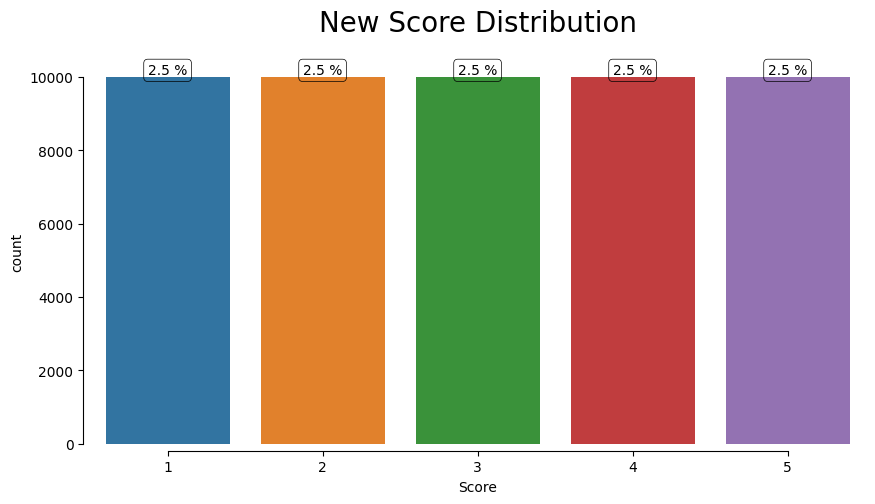

In [23]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=new_df['Score'])
total=float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 75,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
ax.set_title('New Score Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

**Como mostrado, a coluna Score está balanceada e cada valor possui a mesma distribuição, portanto, o modelo não será tendencioso em relação a um valor específico**

# **Pré-processamento de Texto**

In [24]:

import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [ ]:
import nltk
nltk.download('stopwords')

In [28]:
def clean_text(text):
    # 1. Converter para minúsculas
    txt = text.lower()

    # 2. Dividir em palavras
    tokens = word_tokenize(txt)

    # 3. Remover pontuação
    tokens = [word for word in tokens if word not in string.punctuation]

    # 4. Remover stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Remover números
    tokens = [word for word in tokens if not word.isdigit()]

    # 6. Aplicar stemming
    tokens = [stemming.stem(word) for word in tokens]

    # Retornar essas palavras de volta em uma única string
    return ' '.join(tokens)


In [29]:
new_df['cleaned_text'] = new_df['Text'].apply(clean_text)

In [30]:
new_df

,Score,Text,cleaned_text
0,1,The wheat free brownie mix is not to my liking...,the wheat free browni mix like I wo n't reorde...
1,1,"saltyness may be the ""norm"" for products like ...",salty may `` norm '' product like doesnt mean ...
2,1,I purchased this product from Otto's because t...,I purchas product otto 's offer via amazon pri...
3,1,Switch to this food and my dog became very sic...,switch food dog becam sick Go onlin lookup dog...
4,1,please do not take this note as an attack on y...,pleas take note attack product It snoodl hate ...
...,...,...,...
49995,5,I bought this for Halloween and I had SOOOOOO ...,I bought halloween I soooooo much candi left I...
49996,5,My two cockers love this formula of chicken an...,My two cocker love formula chicken sweet potat...
49997,5,Ive hunted high and low and have tried every t...,ive hunt high low tri everi type licoric toffe...
49998,5,We have a rapidly growing 7 month Labradoodle ...,We rapidli grow month labradoodl puppi initi b...


# **Métodos Comuns de Vetorização de Texto**

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



# **Spliting Data**

In [61]:
new_df['Score'] = new_df['Score'].apply(lambda x: 1 if x >=3 else 0)
# 1 --> Good 
#0 --> Bad

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X=new_df['cleaned_text']
y=new_df['Score']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42,test_size = 0.20)


# **Modeling Using ML Models**

# **1. Regressão Logística**

In [38]:
logistic_pipe=Pipeline(
    [
      ('vec',CountVectorizer(stop_words= "english")),
        ('Tf_idf',TfidfTransformer()),
        ('log_rg',LogisticRegression()),

    ]
)


In [66]:
log_fit = logistic_pipe.fit(X_train,y_train)


In [67]:
log_pred=logistic_pipe.predict(X_test)

In [68]:
print('Training accuracy:', log_fit.score(X_train,y_train))
print('Test accuracy:', log_fit.score(X_test,y_test))

In [69]:
sns.heatmap(confusion_matrix(y_test,log_pred), annot=True, fmt="d")

**Fazer previsões usando Regressão Logística**

In [80]:
reviews=['This is an amazing product,I will definetly buy it ',
         'very bad,I dont recommend it at all',
'we received this coffee yesterday, and have to say its amazing',
         'experience was terrible',
         'I will buy again from this site,everything was perfect']
prediction=logistic_pipe.predict(reviews)
sentiment=["Positive" if i == 1 else "Negative" for i in prediction]
# Predicted : P,N,P,N,P    2 errors
print(sentiment)

['Negative', 'Negative', 'Negative', 'Negative', 'Positive']


# **2. Naive Bayes**

              precision    recall  f1-score   support

           0     0.8427    0.3717    0.5158      4036
           1     0.6915    0.9531    0.8015      5964

    accuracy                         0.7184     10000
   macro avg     0.7671    0.6624    0.6586     10000
weighted avg     0.7525    0.7184    0.6862     10000



<Axes: >

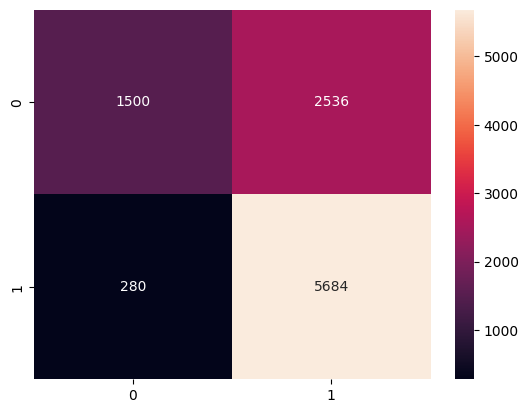

In [70]:
naive_bayes_pipeline = Pipeline([
    ('vec', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])


nb_model = naive_bayes_pipeline.fit(X_train, y_train)
y_pred_nb = naive_bayes_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_nb,digits=4))
sns.heatmap(confusion_matrix(y_test,y_pred_nb), annot=True, fmt="d")

# **3. SVC**

In [71]:
svm_pipeline = Pipeline([
    ('vec', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC())
])


svc = svm_pipeline.fit(X_train, y_train)
y_pred_svc = svm_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_svc,digits=4))


              precision    recall  f1-score   support

           0     0.7757    0.6967    0.7341      4036
           1     0.8080    0.8637    0.8349      5964

    accuracy                         0.7963     10000
   macro avg     0.7919    0.7802    0.7845     10000
weighted avg     0.7950    0.7963    0.7942     10000



<Axes: >

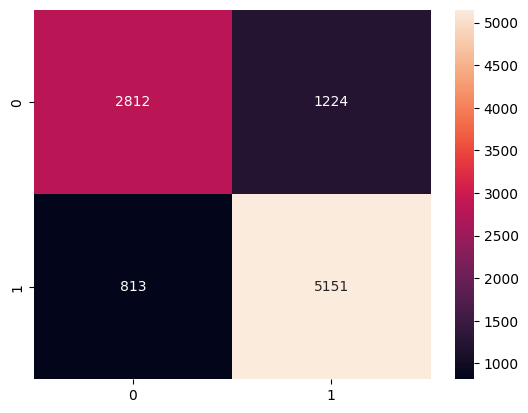

In [72]:
sns.heatmap(confusion_matrix(y_test,y_pred_svc), annot=True, fmt="d")

In [ ]:
print('Acurácia de Treinamento do SVC: ', svc.score(X_train, y_train))
print('Acurácia de Teste do SVC: ', svc.score(X_test, y_test))


In [81]:
reviews=['This is an amazing product,I will definetly buy it ',
         'very bad,I dont recommend it at all',
'we received this coffee yesterday, and have to say its amazing',
         'experience was terrible',
         'I will buy again from this site,everything was perfect']
prediction=svm_pipeline.predict(reviews)
sentiment=["Positive" if i == 1 else "Negative" for i in prediction]
# Predicted : P,N,P,N,P   # only 1 error   
print(sentiment)

['Positive', 'Negative', 'Negative', 'Negative', 'Positive']


In [88]:
new_df['Score']

0        0
1        0
2        0
3        0
4        0
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Name: Score, Length: 50000, dtype: int64

In [89]:
new_df['Text']

0        The wheat free brownie mix is not to my liking...
1        saltyness may be the "norm" for products like ...
2        I purchased this product from Otto's because t...
3        Switch to this food and my dog became very sic...
4        please do not take this note as an attack on y...
                               ...                        
49995    I bought this for Halloween and I had SOOOOOO ...
49996    My two cockers love this formula of chicken an...
49997    Ive hunted high and low and have tried every t...
49998    We have a rapidly growing 7 month Labradoodle ...
49999    we received this coffee yesterday, and have to...
Name: Text, Length: 50000, dtype: object

In [119]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import regularizers

In [135]:
reviews=new_df['Text'].values
sentiments=new_df['Score'].values

# Apply tokenization
tokenizer=Tokenizer(num_words=20000)
tokenizer.fit_on_texts(reviews)
sequences=tokenizer.texts_to_sequences(reviews)

# Padding sequences on reviews to have same length
max_len = 150  # Adjusted max length as reviews are longer
# X as input
X = pad_sequences(sequences, maxlen=max_len)

# Convert sentiments to numpy array
y = np.array(sentiments)



In [91]:
# check reviews
print(reviews)

["The wheat free brownie mix is not to my liking.  I won't be reordering. I'd rather not eat chocolate than to eat these brownies."
 'saltyness may be the "norm" for products like this, but it doesnt mean i have to like it. its probably healthier than a "slim-jim", but i still wont order again because it contains lots of milligrams of unhealthy salt, and it tastes extremely salty. better have a gallon of water nearby to go with it,if you want to try eating these.i hope they can try making a lower sodium version of this some day..'
 "I purchased this product from Otto's because the offering via Amazon Prime was out of stock.  Otto's shipped me four plain tubs without Terrafina labels and sealed with a vertical X of clear packing tape rather than Terrafina's vacuum seal where the tub and the cover meet.  I called Otto's within a few days of receipt and they said they buy in bulk from Terrafina and package it themselves.  They said they were out of Terrafina labels!  Two of the tubs devel

In [99]:
# Check seuences hat icludes indices
print(sequences[:5])

[[1, 516, 153, 2132, 155, 8, 15, 5, 16, 1693, 2, 275, 27, 5218, 241, 366, 15, 106, 96, 53, 5, 106, 28, 1961], [204, 27, 1, 5661, 12, 184, 23, 9, 14, 6, 2613, 864, 2, 20, 5, 23, 6, 173, 237, 861, 53, 3, 2643, 4624, 14, 2, 118, 2104, 140, 97, 71, 6, 503, 738, 7, 7204, 7, 2419, 238, 4, 6, 127, 708, 498, 84, 20, 3, 1896, 7, 99, 3704, 5, 147, 18, 6, 32, 19, 148, 5, 92, 233, 28, 2, 633, 24, 49, 92, 371, 3, 854, 509, 464, 7, 9, 60, 181], [2, 229, 9, 31, 40, 15193, 71, 1, 1941, 1526, 74, 1356, 17, 54, 7, 900, 15193, 695, 47, 547, 578, 4222, 219, 15194, 2248, 4, 943, 18, 3, 10014, 2249, 7, 742, 1465, 2444, 366, 53, 2463, 1295, 332, 1, 2263, 4, 1, 1506, 2829, 2, 628, 15193, 765, 3, 178, 360, 7, 3859, 4, 24, 255, 24, 80, 11, 809, 40, 15194, 4, 188, 6, 1161, 24, 255, 24, 59, 54, 7, 15194, 2248, 125, 7, 1, 4222, 2431, 2026, 765, 3, 178, 360, 7, 16, 773, 5, 15193, 4, 2, 44, 5, 749, 41, 7, 33, 54, 2, 90, 110, 4276, 3, 956, 40, 74], [892, 5, 9, 72, 4, 16, 124, 1474, 38, 971, 147, 609, 4, 9, 124, 72, 4

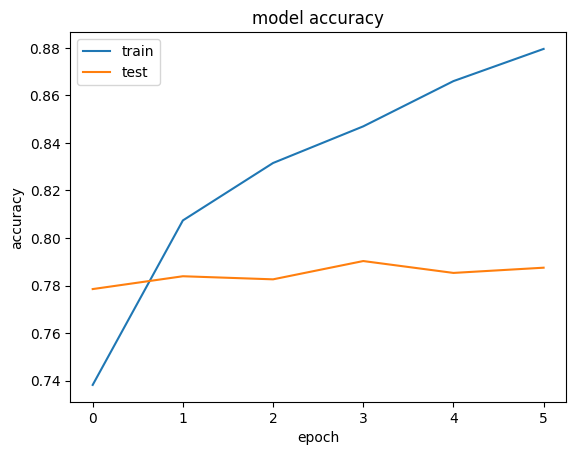

In [140]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Mostrar Perda de Treinamento e Validação**

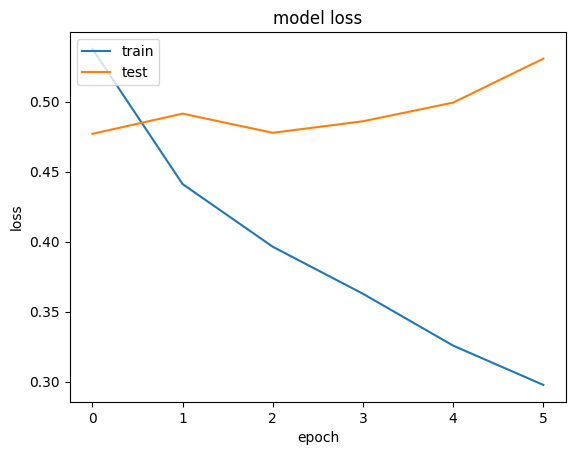

In [141]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [ ]:
# Avaliar o modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)

# Imprimir a precisão final
print(f"Precisão final no teste: {accuracy * 100:.2f}%")


# **Aplicar LSTM nas colunas de Texto e Resumo após combiná-las em uma coluna `New_Text`**

In [143]:
new_df['New_Text']=df['Summary']+' '+new_df['Text']
new_df['New_Text']

0        Good Quality Dog Food The wheat free brownie m...
1        Not as Advertised saltyness may be the "norm" ...
2        "Delight" says it all I purchased this product...
3        Cough Medicine Switch to this food and my dog ...
4        Great taffy please do not take this note as an...
                               ...                        
49995    Grown to really like them I bought this for Ha...
49996    Healthy Snack at a great price! My two cockers...
49997    Raw Revolution Hazelnut Cashew Ive hunted high...
49998    fantastic, but chew carefully We have a rapidl...
49999    Very Tasty and Healthy. we received this coffe...
Name: New_Text, Length: 50000, dtype: object

In [144]:

# Converter todas as entradas para string e substituir NaNs por strings vazias
reviews2 = new_df['Text'].astype(str).fillna('')  
sentimentos2 = new_df['Score'].values

# Aplicar tokenização
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(reviews2)
sequencias = tokenizer.texts_to_sequences(reviews2)

# Preencher sequências de avaliações para ter o mesmo comprimento
comprimento_maximo = 150  # Comprimento máximo ajustado, pois as avaliações são mais longas
# X como entrada
X = pad_sequences(sequencias, maxlen=comprimento_maximo)

# Converter sentimentos para array numpy
y = np.array(sentimentos2)


In [145]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir os parâmetros da LSTM
tamanho_vocabulario = 20000  # como entrada
tamanho_embedding = 200  # como saída


In [146]:
model=Sequential()
model.add(Embedding(input_dim=voca_size,output_dim=embedding_size,input_length=max_len))
model.add(LSTM(256,recurrent_dropout=0.3,dropout=0.3))
model.add(Dropout(0.5)) 
model.add(Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))

In [ ]:
# Compilação do modelo
import tensorflow as tf
optimizador = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=['accuracy'])

# Parada antecipada para prevenir sobreajuste
parada_antecipada = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

checkpoint_modelo = ModelCheckpoint(
    filepath='',  # Caminho onde o modelo será armazenado
    monitor='val_loss',  # Métrica a ser acompanhada
    save_best_only=True,  # Salvar apenas o melhor modelo
    mode='min',  # 'min' porque valores menores de perda são melhores
    verbose=1  # Exibir mensagens detalhadas
)

# Treinamento do modelo LSTM
historico = model.fit(X_train, y_train, 
                      epochs=12, 
                      batch_size=128, 
                      validation_data=(X_test, y_test),
                      callbacks=[parada_antecipada, checkpoint_modelo])


**Mostrar Precisão de Treinamento e Validação**

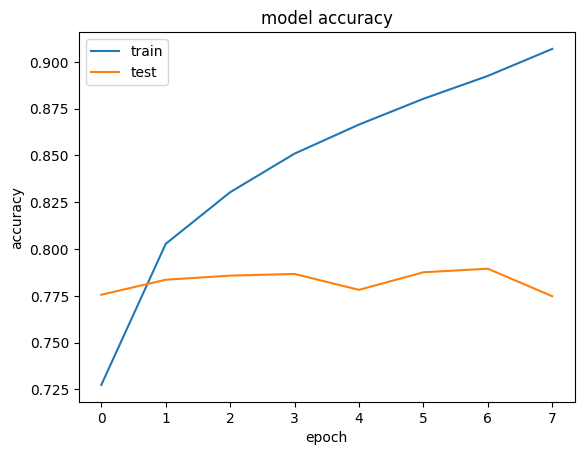

In [148]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('precisão do modelo')
plt.ylabel('precisão')
plt.xlabel('época')
plt.legend(['treinamento', 'teste'], loc='upper left')
plt.show()


**Mostrar Perda de Treinamento e Validação**

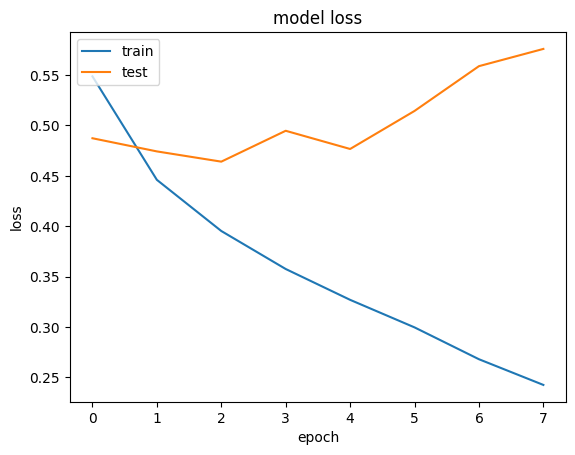

In [149]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('perda do modelo')
plt.ylabel('perda')
plt.xlabel('época')
plt.legend(['treinamento', 'teste'], loc='upper left')
plt.show()


In [ ]:

loss, accuracy = model.evaluate(X_test, y_test)

print(f"Precisão final no teste: {accuracy * 100:.2f}%")


# **Conclusão:**
Pré-processamento rigoroso dos dados, incluindo a remoção de duplicatas e o balanceamento da coluna Score, contribuiu para um treinamento mais eficaz do modelo.
O fato de o modelo ter sido treinado com um conjunto de dados balanceado, onde cada classe teve uma distribuição igual, reduz o viés em relação a qualquer uma das classes, resultando em previsões mais confiáveis.